In [0]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.3)


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pash2048","key":"71239f78a0afd14dd4cee721dc8f30ab"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c digit-recognizer

 72% 53.0M/73.2M [00:00<00:00, 63.1MB/s]
100% 73.2M/73.2M [00:00<00:00, 124MB/s] 
 94% 46.0M/48.8M [00:00<00:00, 68.9MB/s]
100% 48.8M/48.8M [00:00<00:00, 140MB/s] 
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 70.9MB/s]


In [0]:
import pandas as pd
import keras
import matplotlib.pyplot as plt
import matplotlib
import numpy
import cv2
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential


In [0]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
labels = data.pop("label")
data = data.values

In [0]:
data[1]

In [0]:
final_data = list()
for item in data:
  final_data.append(numpy.reshape(item, (-1, 28)))

In [0]:
final_data = numpy.asarray(final_data, dtype=numpy.float32)

In [0]:
final_data= final_data.reshape(-1)

In [0]:
def valid_imshow_data(data):
    data = numpy.asarray(data)
    if data.ndim == 2:
        return True
    elif data.ndim == 3:
        if 3 <= data.shape[2] <= 4:
            return True
        else:
            print('The "data" has 3 dimensions but the last dimension '
                  'must have a length of 3 (RGB) or 4 (RGBA), not "{}".'
                  ''.format(data.shape[2]))
            return False
    else:
        print('To visualize an image the data must be 2 dimensional or '
              '3 dimensional, not "{}".'
              ''.format(data.ndim))
        return False

In [0]:
valid_imshow_data(final_data[1])

True

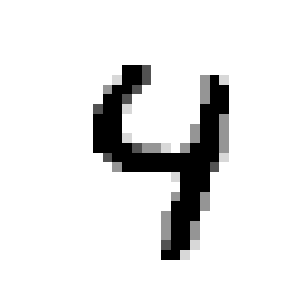

4


In [0]:
pic1_data = final_data[78]
pic1_label = labels[78]
plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(pic1_data)
plt.show()
print(pic1_label)

In [0]:
data_norm = final_data/255

In [0]:
data_norm = data_norm.reshape(42000,784)

In [0]:
data_norm.shape

(42000, 784)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_norm,labels)
print("size of training dataset is: " + str(X_train.shape))
print("size of test dataset is: " + str(X_test.shape))

size of training dataset is: (31500, 784)
size of test dataset is: (10500, 784)


In [0]:
n_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, n_classes)
y_test_cat =  keras.utils.to_categorical(y_test, n_classes)
y_train_cat[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
model = Sequential()
model.add(Dense(784,activation = 'sigmoid', input_shape = (784,)))
model.add(Dense(784,activation = 'sigmoid'))
model.add(Dense(784,activation = 'sigmoid'))
model.add(Dense(10, activation='softmax'))


In [0]:
model.compile(loss = 'categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train_cat, batch_size = 512, epochs=100,verbose = 1)

Epoch 1/100
31500/31500 [==============================] - 8s 251us/step - loss: 1.6315 - acc: 0.4759
Epoch 2/100
31500/31500 [==============================] - 7s 236us/step - loss: 0.4338 - acc: 0.8692
Epoch 3/100
31500/31500 [==============================] - 7s 237us/step - loss: 0.3011 - acc: 0.9097
Epoch 4/100
31500/31500 [==============================] - 7s 236us/step - loss: 0.2563 - acc: 0.9217
Epoch 5/100
31500/31500 [==============================] - 7s 235us/step - loss: 0.2166 - acc: 0.9351
Epoch 6/100
31500/31500 [==============================] - 7s 234us/step - loss: 0.1938 - acc: 0.9430
Epoch 7/100
31500/31500 [==============================] - 7s 237us/step - loss: 0.1730 - acc: 0.9483
Epoch 8/100
31500/31500 [==============================] - 8s 238us/step - loss: 0.1566 - acc: 0.9532
Epoch 9/100
31500/31500 [==============================] - 7s 238us/step - loss: 0.1403 - acc: 0.9581
Epoch 10/100
31500/31500 [==============================] - 7s 237us/step - loss: 

In [0]:
model.evaluate(X_test,y_test_cat)

10500/10500 [==============================] - 2s 178us/step


[0.1390435059905479, 0.9814285714285714]

In [0]:
test_data = pd.read_csv("test.csv")
test_data = test_data.values

final_test_data = list()

for item in test_data:
  final_test_data.append(numpy.reshape(item, (-1, 28)))
  
  
final_test_data = numpy.asarray(final_test_data, dtype=numpy.float32)  

In [0]:
final_test_data.shape

(28000, 28, 28)

In [0]:
final_test_data_norm = final_test_data/255
test_data_norm = final_test_data.reshape(28000,784)

In [0]:
preds = model.predict_classes(test_data_norm)
preds

array([2, 0, 9, ..., 3, 9, 2])

In [0]:
preds.shape

(28000,)

In [0]:
send_data = pd.read_csv("sample_submission.csv")
send_data.head(n=10)

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [0]:
for i in range(0,28000):
   send_data["Label"][i]=preds[i]

In [0]:
send_data.to_csv("for_send_2.csv", index=False)

In [0]:
send_data.head(n=10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
